## Fucnion para el calculo del liouvilliano

In [359]:
import sympy as sp
from sympy.physics.quantum import Dagger
    
def calculate_liouvillian(H, L, n, num_L):
    sp.init_printing(use_unicode=True)  # Print bonito
    rho = sp.Matrix(2**n, 2**n, lambda i, j: sp.symbols(f'rho_{i+1}{j+1}'))#defino rho como una matriz simbólica

    """ 
    # Calculamos el adjunto de cada matriz L_q
    for i in range(num_L):
        L_adj[i] = [Dagger(L_q) for L_q in L[i]]
    """
    
    # Ahora operamos
    i = sp.I  # Def la unidad imaginaria

    # Cálculo de term1 y term2
    term1 = -i * (H @ rho - rho @ H)
    term2 = sp.Matrix.zeros(2**n, 2**n)
    for i in range(num_L):
        for q in range(n):
            term2 += L[i][q] @ rho @Dagger(L[i][q]) - 0.5 * (Dagger(L[i][q]) @ L[i][q] @rho + rho @ Dagger(L[i][q]) @L[i][q])


    # Definir rho_t
    rho_t = (term1 + term2).reshape(2**(2*n), 1) #espacio FL
    rho_vec=rho_t

    #cero un vector de variables rho_ij
    rho_vars = [rho[i, j] for i in range(2**n) for j in range(2**n)]

    # calculo el jacobiano respecto a los elementos de rho
    J = rho_t.jacobian(rho_vars)

    return J,rho_vec


## Función reducir matriz


In [730]:
import numpy as np

def reducir_matriz(matriz):
       
    # índices donde tanto la fila como la columna son completamente ceros
    indices_a_eliminar = []
    for i in range(matriz.shape[0]):
        if np.all(matriz[i, :] == 0) and np.all(matriz[:, i] == 0):
            indices_a_eliminar.append(i)
    
    # filas y columnas a conservar
    indices_conservar = [i for i in range(matriz.shape[0]) if i not in indices_a_eliminar]
    
    # Reducir la matriz a los índices que se van a conservar
    matriz_reducida = matriz[np.ix_(indices_conservar, indices_conservar)]
    
    return matriz_reducida

## Definicion del hamiltoniano y los jumps operators, parametros

In [5]:
"""
import numpy as np
from qiskit.quantum_info import Operator, Pauli

#tamaño del sistema
N = 2
n= N #dim matriz
#guardo los operadores para cada qubit
x_ops = []
y_ops = []
z_ops = []
qubits = range(N)

#defino un operador de ceros, ya que la función Pauli detecta la dim al sumarle este operador y 
#devuelve la matriz de pauli correspondiente en esa dim
zeros = Operator(np.zeros((2 ** N, 2 ** N)))

for i in qubits:
    X =  Pauli('X')(i) + zeros
    x_ops.append(X)

    Y = zeros + Pauli('Y')(i)
    y_ops.append(Y)

    Z = zeros + Pauli('Z')(i)
    z_ops.append(Z)

# Definimos los estados triplete (S = 1)
state_triplet_1 = np.array([1, 0, 0, 0])  # |↑↑⟩


# Construimos el operador de proyección P_{S=1} al subespacio S=1 Sz=1
P_S1 = np.outer(state_triplet_1, state_triplet_1) # |↑↑⟩⟨↑↑|

#definimos algunos parámetros
g = 0.1
Gamma = 4.
num_L=3 #numero de operadores de salto
alpha=0.
eta=[]
x=[]
for i in qubits:
    Eta=0.5+(i+1)/N +np.random.uniform(-1/N, 1/N)
    x_i=np.sqrt((1-alpha)+alpha*Eta**2)
    eta.append(Eta)
    x.append(x_i)

#definimos el hamiltoniano

H = np.zeros((2**N, 2**N), dtype=complex)
for i in qubits:
    Z = z_ops[i]
    H -= -eta[i]* Z

   
        
H_matrix = sp.Matrix(H)  # Convierte H a una matriz de numpy

#jump operators
#+-
L_op= [[] for _ in range(num_L)]
for i in qubits:
    X = x_ops[i].data  # Convierte X a numpy
    Y = y_ops[i].data  # Convierte Y a numpy
    
    L= np.sqrt(g/2) *x[i]* 0.5 * (X + 1j * Y)
    #L= np.sqrt(Gamma) * 0.5 * (Z)
    L_q=sp.Matrix(L) #importante que esté en este formato
    L_op[0].append(L_q)

#z1
for i in qubits:
    Z = z_ops[i].data  # Convierte Y a numpy
    
    L= np.sqrt((1-alpha)*g/2)*Z
    #L= np.sqrt(Gamma) * 0.5 * (Z)
    L_q=sp.Matrix(L) #importante que esté en este formato
    L_op[1].append(L_q)

#z2
for i in qubits:
    Z = z_ops[i].data  # Convierte Y a numpy
    
    L= np.sqrt(alpha*g/2)*Z
    #L= np.sqrt(Gamma) * 0.5 * (Z)
    L_q=sp.Matrix(L) #importante que esté en este formato
    L_op[2].append(L_q)
    
liouvillian,rho_vec= calculate_liouvillian(H_matrix, L_op, N,num_L)
liouvillian
"""


⎡0              0                            0                           0     ↪
⎢                                                                              ↪
⎢0  -0.125 - 1.2582104011141⋅ⅈ               0                           0     ↪
⎢                                                                              ↪
⎢0              0               -0.125 - 3.00536421784434⋅ⅈ              0     ↪
⎢                                                                              ↪
⎢0              0                            0               -0.25 - 4.2635746 ↪
⎢                                                                              ↪
⎢0              0                            0                           0     ↪
⎢                                                                              ↪
⎢0              0                            0                           0     ↪
⎢                                                                              ↪
⎢0              0           

## Reducción al subespacio S_z=1

In [388]:
import numpy as np
from qiskit.quantum_info import Operator, Pauli

#tamaño del sistema
N = 4
#n= N #dim matriz
#guardo los operadores para cada qubit
x_ops = []
y_ops = []
z_ops = []
qubits = range(N)

#defino un operador de ceros, ya que la función Pauli detecta la dim al sumarle este operador y 
#devuelve la matriz de pauli correspondiente en esa dim
zeros = Operator(np.zeros((2 ** N, 2 ** N)))

for i in qubits:
    X =  Pauli('X')(i) + zeros
    x_ops.append(0.5*X)

    Y = zeros + Pauli('Y')(i)
    y_ops.append(0.5*Y)

    Z = zeros + Pauli('Z')(i)
    z_ops.append(0.5*Z)

#operador sz total
s2 = np.zeros((2**N, 2**N), dtype=complex)
sz = np.zeros((2**N, 2**N), dtype=complex)
for i in qubits:
    X = x_ops[i].data  # Convierte X a numpy
    Y = y_ops[i].data  # Convierte Y a numpy
    Z = z_ops[i].data  # Convierte Z a numpy
    sz += Z #operador sz total
    #s2 += np.dot(Z,Z) +0.5*(np.dot(X+1j*Y,X-1j*Y)+ np.dot(X-1j*Y,X+1j*Y))


#Calculo los autovectores de sz y sus autovalores
eigenvalues, eigenvectors = np.linalg.eig(sz)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

#calculo el operador de proyeccion para todos los vectores cuyo autovalor sea 1
P_S1 = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    if eigenvalues[i] ==1:
        P_S1 += np.outer(eigenvectors[:,i], eigenvectors[:,i])
        print(eigenvalues[i],eigenvectors[:,i])


#ps1=matriz identidad
#P_S1 = np.eye(2**N)
#print(P_S1)

(1+0j) [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
(1+0j) [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
(1+0j) [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
(1+0j) [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


## Trabajamos con el subespacio sz=1

In [394]:
#definimos algunos parámetros
g = 1/N
num_L=3 #numero de operadores de salto
alpha=0.
eta=[]
x=[]

for i in qubits:
    Eta=0.5+(i+1)/N +np.random.uniform(-1/N, 1/N)
    x_i=np.sqrt((1-alpha)+alpha*Eta**2)
    eta.append(Eta)
    x.append(x_i)
print(eta)

#definimos el hamiltoniano
H = np.zeros((2**N, 2**N), dtype=complex)
for i in qubits:
    Z = P_S1@z_ops[i].data@P_S1
    H -= -eta[i]* Z

   
        
H_matrix = sp.Matrix(H)  # Convierte H a una matriz de numpy

#jump operators
#+-
L_op= [[] for _ in range(num_L)]
for i in qubits:
    X = P_S1@x_ops[i].data@P_S1  # Convierte X a numpy
    Y = P_S1@y_ops[i].data@P_S1  # Convierte Y a numpy
    
    L= np.sqrt(g/2) *x[i]* 0.5 * (X + 1j * Y)
    #L= np.sqrt(Gamma) * 0.5 * (Z)
    L_q=sp.Matrix(L) #importante que esté en este formato
    L_op[0].append(L_q)


#z1
for i in qubits:
    Z = P_S1@z_ops[i].data@P_S1  # Convierte Y a numpy
    
    L= np.sqrt((1-alpha)*g/2)*Z
    #L= np.sqrt(Gamma) * 0.5 * (Z)
    L_q=sp.Matrix(L) #importante que esté en este formato
    L_op[1].append(L_q)

#z2
for i in qubits:
    Z = P_S1@z_ops[i].data@P_S1  # Convierte Y a numpy
    
    L= np.sqrt(alpha*g/2)*eta[i]*Z
    #L= np.sqrt(Gamma) * 0.5 * (Z)
    L_q=sp.Matrix(L) #importante que esté en este formato
    L_op[2].append(L_q)
    
liouvillian,rho_vec= calculate_liouvillian(H_matrix, L_op, N, num_L)
#liouvillian





[0.9710312898240991, 1.019183667277066, 1.3337823955960073, 1.4329895029225117]


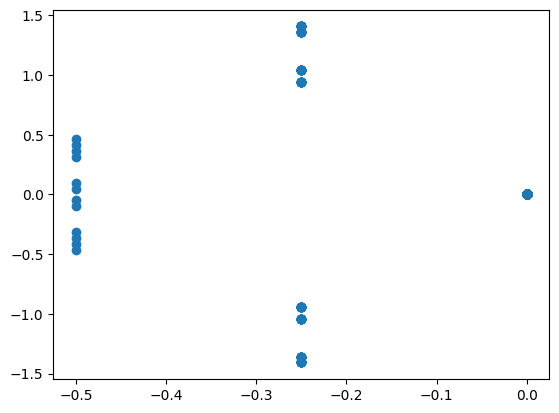

In [395]:
from scipy.linalg import eig

#calculo los autovalores de L_int
liouvillian= np.matrix(liouvillian).astype(np.complex64)
eigenvalues = np.linalg.eigvals(liouvillian)
#print(eigenvalues)


#hago un plot de los autovalores, siendo el eje x la parte real y el eje y la parte imaginaria
import matplotlib.pyplot as plt
plt.scatter(eigenvalues.real/g, eigenvalues.imag)
plt.show()

## Mismo liouvilliano pero con interpretacion spin 1

In [356]:
import numpy as np
import sympy as sp
from qiskit.quantum_info import Operator, Pauli

#tamaño del sistema
N = 4
n= N #dim matriz
#guardo los operadores para cada qubit
x_ops = []
y_ops = []
z_ops = []
qubits = range(N)
#guardo los operadores para cada qubit
sx_ops = []
sy_ops = []
sz_ops = []
kz_ops=[]
kplus_ops=[]
kminus_ops=[]
qubits = range(N)
hbar =1. #6.62607015e-34 / (2 * np.pi)
  

#defino un operador de ceros, ya que la función Pauli detecta la dim al sumarle este operador y 
#devuelve la matriz de pauli correspondiente en esa dim
zeros = Operator(np.zeros((2 ** N, 2 ** N)))
Id= np.eye(2**N, dtype=complex)
# Proyectar el operador O al subespacio S=1 usando P_{S=1}

for i in qubits:
    X =  (Pauli('X')(i) + zeros)
    sx_ops.append(hbar/2*X)
    
    Y = zeros + Pauli('Y')(i)
    sy_ops.append(hbar/2*Y)

    Z = zeros + Pauli('Z')(i)
    sz_ops.append(hbar/2*Z)
"""
sz = np.zeros((2**N, 2**N), dtype=complex)
for i in qubits:
    X = sx_ops[i].data  # Convierte X a numpy
    Y = sy_ops[i].data  # Convierte Y a numpy
    Z = sz_ops[i].data  # Convierte Z a numpy
    sz += Z
    #s2 += np.dot(Z,Z) +0.5*(np.dot(X+1j*Y,X-1j*Y)+ np.dot(X-1j*Y,X+1j*Y))
"""

#Calculo los autovectores de Kz y sus autovalores
kz_total=np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
#definimos los operadores del modelo
for i in qubits:
    sx=np.matrix(sx_ops[i].data)
    sy=np.matrix(sy_ops[i].data)
    sz=np.matrix(sz_ops[i].data)

    Kz=np.kron(sz,Id)+np.kron(Id,(sz.transpose()))
    kz_total += Kz
#print(kz_total)


eigenvalues, eigenvectors = np.linalg.eig(kz_total)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]


#calculo el operador de proyeccion para todos los vectores cuyo autovalor sea 1
P_S1 = np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
for i in range(2**(2*N)):
    if (abs(eigenvalues[i].real-1)<1e-10):
        P_S1 += np.outer(eigenvectors[:,i], eigenvectors[:,i])
        #print(eigenvalues[i],eigenvectors[:,i])

#ps1=matriz identidad
#P_S1 = np.eye(2**N)

#definimos los operadores del modelo

for i in qubits:
    sx=np.matrix(sx_ops[i].data)
    sy=np.matrix(sy_ops[i].data)
    sz=np.matrix(sz_ops[i].data)

    Kz=np.kron(sz,Id)+np.kron(Id,(sz.transpose()))
    kz_ops.append(Kz)
   
    Splus=0.5*(np.kron(sx,Id)+1j*np.kron(sy,Id))
    Jplus=0.5*(np.kron(Id,sx.transpose())+1j*np.kron(Id,sy.transpose()))
    Kplus=np.matrix(Splus+Jplus)
    kplus_ops.append(Kplus)

    Sminus=0.5*(np.kron(sx,Id)-1j*np.kron(sy,Id))
    Jminus=0.5*(np.kron(Id,sx.transpose())-1j*np.kron(Id,sy.transpose()))
    Kminus=np.matrix(Sminus+Jminus)
    kminus_ops.append(Kminus)



#definimos los parámetros del modelo
alpha=0.
g=1/N
eta=[]
x=[]
for i in qubits:
    Eta=np.sqrt(0.5+(i+1)/N +np.random.uniform(-1/N, 1/N))
    x_i=np.sqrt((1-alpha)+alpha*Eta**2)
    eta.append(Eta)
    x.append(x_i)


In [357]:
#escribimos la familia de liouvillianos integrables
from scipy.linalg import eig

L_int=np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
for i in qubits:
    L_int += -1j*eta[i]*kz_ops[i] 
    for j in qubits:
        if i!=j:
            L_int +=-g*0.5*((1-alpha)+alpha*eta[i]*eta[j])*kz_ops[i]@kz_ops[j] -g*0.5*x[i]*x[j]*0.5*(kplus_ops[i]@kminus_ops[j]+kminus_ops[j]@kplus_ops[i])
       
            
L_int_kz1=P_S1@L_int@P_S1  
       


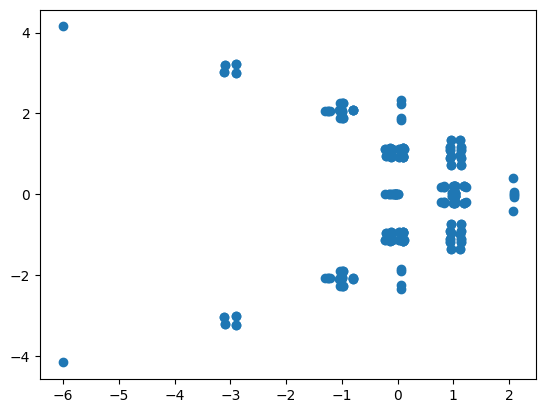

In [358]:
#print del L_int para que se vea la matriz entera en pantalla sin cortar
np.set_printoptions(threshold=np.inf)

#calculo los autovalores de L_int
eigenvalues = np.linalg.eigvals(L_int)
#print(eigenvalues)

#hago un plot de los autovalores, siendo el eje x la parte real y el eje y la parte imaginaria
import matplotlib.pyplot as plt
plt.scatter(eigenvalues.real/g, eigenvalues.imag)
plt.show()

# Mirar a partir de aqui


## Paso de la interpretacion espin 1 a interpolacion a cadena de 2*N espines

In [1015]:
import numpy as np
import sympy as sp
from qiskit.quantum_info import Operator, Pauli
from scipy.sparse.linalg import eigs

#tamaño del sistema
N = 4
n= N #dim matriz
qubits = range(2*N)
#guardo los operadores para cada qubit
sx_ops = []
sy_ops = []
sz_ops = []
kx_ops=[]
kz_ops=[]
kplus_ops=[]
kminus_ops=[]
k2_ops=[]
hbar =1. #6.62607015e-34 / (2 * np.pi)
  
#defino un operador de ceros, ya que la función Pauli detecta la dim al sumarle este operador y 
#devuelve la matriz de pauli correspondiente en esa dim
zeros = Operator(np.zeros((2 ** (2*N), 2 ** (2*N))))
Id= np.eye(2**N, dtype=complex)
# Proyectar el operador O al subespacio S=1 usando P_{S=1}

for i in qubits:
    X =  (Pauli('X')(i) + zeros)
    sx_ops.append(hbar/2*X)
    
    Y = zeros + Pauli('Y')(i)
    sy_ops.append(hbar/2*Y)

    Z = zeros + Pauli('Z')(i)
    sz_ops.append(hbar/2*Z)

#Calculo los autovectores de Kz y sus autovalores
kz_total=np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
#definimos los operadores del modelo
for i in qubits:
  
    sx=np.matrix(sx_ops[i].data)
    sy=np.matrix(sy_ops[i].data)
    sz=np.matrix(sz_ops[i].data)

    kz_total += sz


eigenvalues, eigenvectors = np.linalg.eig(kz_total)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
#print(eigenvalues)

#calculo el operador de proyeccion para todos los vectores cuyo autovalor sea 1
P_S1 = np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
for i in range(2**(2*N)):
    if ((eigenvalues[i]==1)):
        P_S1 += np.outer(eigenvectors[:,i], eigenvectors[:,i])
        #print(eigenvalues[i],eigenvectors[:,i])

#print(P_S1)

#definimos los operadores del modelo

for i in qubits:
  
    sx=np.matrix(sx_ops[i].data)
    sy=np.matrix(sy_ops[i].data)
    sz=np.matrix(sz_ops[i].data)

    Kz=sz
    kz_ops.append(Kz)
    
    Splus=0.5*(sx+1j*sy)
    Kplus=np.matrix(Splus)
    kplus_ops.append(Kplus)

    Sminus=0.5*(sx-1j*sy)
    Kminus=np.matrix(Sminus)
    kminus_ops.append(Kminus)

    k2=sz@sz+ 0.5*(Splus@Sminus+Sminus@Splus) 
    k2=np.matrix(k2)
    k2_ops.append(k2)


#definimos los parámetros del modelo
alpha=1.
g=1.
eta=[]
x=[]
for i in range(N):
    Eta=0.5+(i+1)/(N)+np.random.uniform(-1./(N), 1./(N))
    x_i=np.sqrt((1.-alpha)+alpha*Eta*Eta)
    eta.append(Eta)
    x.append(x_i)
    

for i in range(N):
    x_i=x[i]
    Eta=eta[i]
    eta.append(Eta)
    x.append(x_i)


In [1016]:
#escribimos la familia de liouvillianos integrables
from scipy.linalg import eig

if alpha==0:
    L_int=np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
    for i in qubits:
        L_int += -1j*eta[i]*kz_ops[i] 
        for j in qubits:
            if (i!=j):
                L_int +=-g*0.5*np.dot(kz_ops[i],kz_ops[j]) -g*0.5*0.5*(np.dot(kplus_ops[i],kminus_ops[j])+np.dot(kminus_ops[i],kplus_ops[j]))
if alpha==1:
    L_int=np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
    for i in qubits:
        L_int += -1j*eta[i]*kz_ops[i] 
        for j in qubits:
            if (i!=j):
                L_int +=-g*0.5*(eta[i]*eta[j])*np.dot(kz_ops[i],kz_ops[j]) -g*0.5*(eta[i]*eta[j])*0.5*(np.dot(kplus_ops[i],kminus_ops[j])+np.dot(kminus_ops[i],kplus_ops[j]))
else:
    L_int=np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
    for i in qubits:
        L_int += -1j*eta[i]*kz_ops[i] 
        for j in qubits:
            if (i!=j):
                L_int +=-g*0.5*((1.-alpha)+alpha*eta[i]*eta[j])*np.dot(kz_ops[i],kz_ops[j]) -g*0.5*x[i]*x[j]*0.5*(np.dot(kplus_ops[i],kminus_ops[j])+np.dot(kminus_ops[i],kplus_ops[j]))

L_int_kz1=P_S1.transpose()@L_int@P_S1  


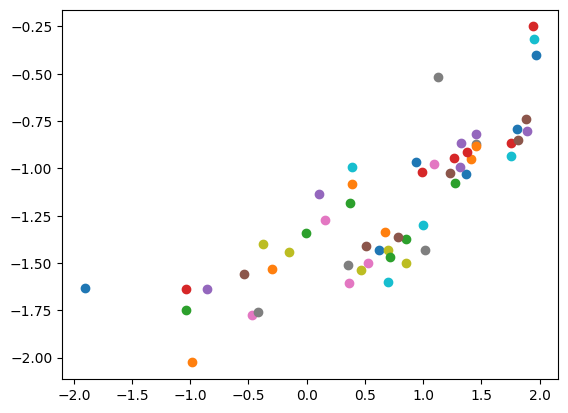

In [1017]:
#print del L_int para que se vea la matriz entera en pantalla sin cortar
np.set_printoptions(threshold=np.inf)

#calculo los autovalores de L_int
eigenvalues = np.linalg.eigvals(L_int_kz1)
#print(eigenvalues)

#hago un plot de los autovalores, siendo el eje x la parte real y el eje y la parte imaginaria
#solo hago plot de los autovalores que no son cero


import matplotlib.pyplot as plt
for i in range(len(eigenvalues)):
        if eigenvalues[i]!=0:
            plt.scatter(eigenvalues[i].real, eigenvalues[i].imag)
       
plt.show()


## Liouvilliano caotico

In [851]:
import math
#Liouvilliano caótico

#definimos los parámetros del modelo
n_j=math.ceil(N/2)
rand_vects=range(n_j)
gamma=1/N

#creamos los vectores ortonormales aleatorios
omega = [[] for _ in range(n_j+1)]
#añado el vector x porque los w^a son ortonormales a x tambien
for i in range(N):
        x_i=x[i]
        omega[0].append(x_i)

for a in rand_vects:
    for i in range(N):
        #genero un numero aleatorio entre 
        omega_i=np.random.uniform(-1/2, 1/2)
        omega[a+1].append(omega_i)

#el resto de valores del vector omega los pongo a 0
#luego esos valores deben cumplir omega(i+N)=omega(i)
for a in range(n_j+1):
     for i in range(N):
        omega_i=0.
        omega[a].append(omega_i)

        
#convierto omega[a] en un array
omega=np.array(omega)

#ortonormalizamos con gram-schmidt
for a in range(n_j+1):
        for b in range(a):
                omega[a]-= np.dot(omega[a].transpose(),omega[b])/np.dot(omega[b].transpose(),omega[b])*omega[b]

#condiciones al aplicar 2*N espines
for a in rand_vects:
    for i in range(N):
        omega_i=omega[a+1,i]
        omega[a+1,i+N]=omega_i

L_chaos=np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
for i in qubits:
    L_chaos += -1j*eta[i]*kz_ops[i] 

    for a in range(n_j):
        L_chaos += gamma*omega[a+1,i]*omega[a+1,i]*(kz_ops[i]@kz_ops[i]-k2_ops[i])

        for j in qubits:
            if i!=j:
                L_chaos += -gamma*omega[a+1,i]*omega[a+1,j]*0.5*(np.dot(kplus_ops[i],kminus_ops[j])+np.dot(kminus_ops[i],kplus_ops[j])) 
             
L_chaos_kz1=P_S1.transpose()@L_chaos@P_S1

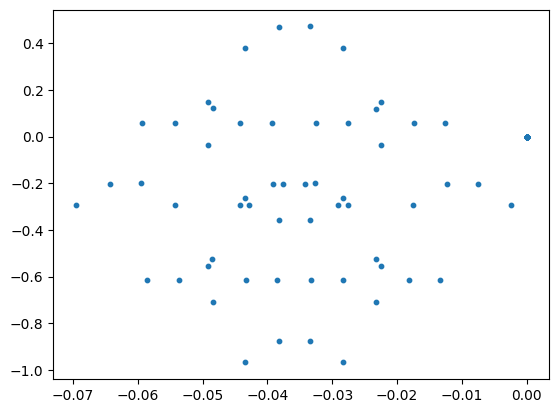

In [852]:
beta=1.
L_total=(1.-beta)*L_int+beta*L_chaos
L_total_kz1=(1.-beta)*L_int_kz1+beta*L_chaos_kz1
#print del L_int para que se vea la matriz entera en pantalla sin cortar
np.set_printoptions(threshold=np.inf)

#calculo los autovalores de L_int
eigenvalues = np.linalg.eigvals(L_total_kz1)
#print(eigenvalues)

#hago un plot de los autovalores, siendo el eje x la parte real y el eje y la parte imaginaria
import matplotlib.pyplot as plt
plt.scatter(eigenvalues.real/g, eigenvalues.imag, s=10)
#cambio el eje y de rango
#plt.ylim(-1.6,-0.4)
plt.show()

## Liouvilliano notas

In [753]:
import numpy as np
import sympy as sp
from qiskit.quantum_info import Operator, Pauli
from scipy.sparse.linalg import eigs

#tamaño del sistema
N = 4
n= N #dim matriz
qubits = range(2*N)
#guardo los operadores para cada qubit
sx_ops = []
sy_ops = []
sz_ops = []
kx_ops=[]
kz_ops=[]
kplus_ops=[]
kminus_ops=[]
hbar =1. #6.62607015e-34 / (2 * np.pi)
  
#defino un operador de ceros, ya que la función Pauli detecta la dim al sumarle este operador y 
#devuelve la matriz de pauli correspondiente en esa dim
zeros = Operator(np.zeros((2 ** (2*N), 2 ** (2*N))))
Id= np.eye(2**N, dtype=complex)
# Proyectar el operador O al subespacio S=1 usando P_{S=1}

for i in qubits:
    X =  (Pauli('X')(i) + zeros)
    sx_ops.append(hbar/2*X)
    
    Y = zeros + Pauli('Y')(i)
    sy_ops.append(hbar/2*Y)

    Z = zeros + Pauli('Z')(i)
    sz_ops.append(hbar/2*Z)

#Calculo los autovectores de Kz y sus autovalores
kz_total=np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
#definimos los operadores del modelo
for i in qubits:
  
    sx=np.matrix(sx_ops[i].data)
    sy=np.matrix(sy_ops[i].data)
    sz=np.matrix(sz_ops[i].data)

    kz_total += sz


eigenvalues, eigenvectors = np.linalg.eig(kz_total)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
#print(eigenvalues)

#calculo el operador de proyeccion para todos los vectores cuyo autovalor sea 1
P_S1 = np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
for i in range(2**(2*N)):
    if ((eigenvalues[i]==1)):
        P_S1 += np.outer(eigenvectors[:,i], eigenvectors[:,i])
        #print(eigenvalues[i],eigenvectors[:,i])

#print(P_S1)

#definimos los operadores del modelo

for i in qubits:
  
    sx=np.matrix(sx_ops[i].data)
    sy=np.matrix(sy_ops[i].data)
    sz=np.matrix(sz_ops[i].data)
    
   
    Kz=sz
    kz_ops.append(Kz)

    Kx=sx
    kx_ops.append(Kx)
    
    Splus=0.5*(sx+1j*sy)
    Kplus=np.matrix(Splus)
    kplus_ops.append(Kplus)

    Sminus=0.5*(sx-1j*sy)
    Kminus=np.matrix(Sminus)
    kminus_ops.append(Kminus)


#definimos los parámetros del modelo
alpha=0
gamma=0.1
eta=[]
for i in range(N):
    Eta=np.sqrt((i+1)/(N))
    eta.append(Eta)

for i in range(N):
    Eta=eta[i]
    eta.append(Eta)
"""
eta=[]
#eta=[1/N, 0.906,0.96,0.994,1]
eta=[1/N,0.528,0.908,0.996,1]
for i in range(N):
    Eta=eta[i]
    eta.append(Eta)
"""

'\neta=[]\n#eta=[1/N, 0.906,0.96,0.994,1]\neta=[1/N,0.528,0.908,0.996,1]\nfor i in range(N):\n    Eta=eta[i]\n    eta.append(Eta)\n'

In [756]:
#escribimos la familia de liouvillianos integrables
from scipy.linalg import eig

L_int=np.zeros((2**(2*N), 2**(2*N)), dtype=complex)
for i in qubits:
    L_int +=( -1j*(eta[i]*eta[i]*kz_ops[i]+ alpha*eta[i]*kx_ops[i]) )
    for j in qubits:
        if (i!=j):
            L_int +=(-gamma*0.5*eta[i]*eta[j]*(np.dot(kplus_ops[i],kminus_ops[j])+np.dot(kminus_ops[i],kplus_ops[j])))
       
            
L_int_kz1=P_S1.transpose()@L_int@P_S1  


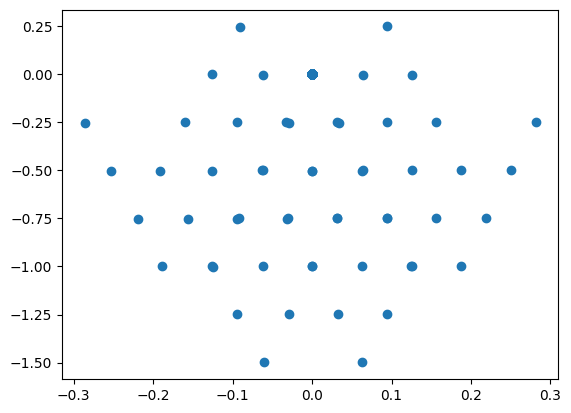

In [757]:
#print del L_int para que se vea la matriz entera en pantalla sin cortar
np.set_printoptions(threshold=np.inf)

#calculo los autovalores de L_int
eigenvalues = np.linalg.eigvals(L_int)
#print(eigenvalues)

#hago un plot de los autovalores, siendo el eje x la parte real y el eje y la parte imaginaria
import matplotlib.pyplot as plt
plt.scatter(eigenvalues.real/gamma, eigenvalues.imag)
plt.show()